# Add a map to your website

Get started with maps

Nate Quarderer  
Elsa Culler  
2024-03-28

## Get started with map-making using open-sources tools

### Finding locations and boundaries

[Open Street Map (OSM)](https://www.openstreetmap.org/) is an
open-source, editable map of the world – a little like a wiki for
places. They also provide a service for looking up locations using text,
which we’ll be using in this activity.

### Mapping libraries

You’ll need to start by importing the following libraries:

In [1]:
# Work with vector data
import geopandas as gpd

# Save maps and plots to files
import holoviews as hv
# Create interactive maps and plots
import hvplot.pandas

# Search for locations by name - this might take a moment
from osmnx import features as osm


import osmnx as ox
import matplotlib.pyplot as plt

### Search for a point of interest

You can use the `pyrosm` package to download and search for spatial
vector data in your area, or anywhere around the world.

In this case, we’re looking for the location of the United Tribes
Technical College campus in North Dakota. The address in here,
`'United Tribes Technical College, Bismarck, ND, United States'`, does
not have to be complete or exact, but it should be specific enough to
narrow it down. We are also specifying that we want it to be tagges as a
`'amentity'` type, specifically a `'college'` You might have to try a
couple different searches with different addresses and/or tags to get
the address you want, just like if you are using a map website or app.

In [2]:
# Search for United Tribes Technical College
uttc_gdf = osm.features_from_address(
    'United Tribes Technical College, Bismarck, ND, United States',
    {'amenity': ['college']})
uttc_gdf

nodes  \
element_type osmid                                                           
way          1157021269  [10759584855, 10759584856, 10759584857, 450404...   

                        addr:city addr:housenumber addr:postcode addr:state  \
element_type osmid                                                            
way          1157021269  Bismarck             3315         58504         ND   

                              addr:street  amenity  \
element_type osmid                                   
way          1157021269  University Drive  college   

                                                    name            website  \
element_type osmid                                                            
way          1157021269  United Tribes Technical College  https://uttc.edu/   

                         wikidata  \
element_type osmid                  
way          1157021269  Q7893617   

                                                                  geometry  
element_type osmid                                                          
way          1157021269  POLYGON ((-100.76305 46.76853, -100.76302 46.7...

<Axes: >

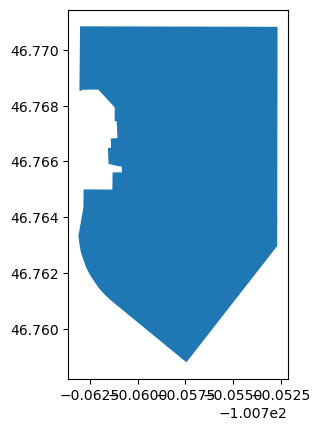

In [3]:
uttc_gdf.plot()

We have a map of the UTTC Campus!

> **Warning**
>
> The Open Street Maps (OSM) database is not always complete. For
> example, try searching for UTTC with the `{'building': True}`, and
> compare it to the [map of the UTTC campus on their
> website](https://uttc.edu/wp-content/uploads/2022/12/CAMPUS-MAP-2022-23.pdf).
> What do you notice?

### Create an interactive map

There are lots of different ways to create maps and plots in Python.
Here, we’re going to use a tool called `'hvplot'` and `'geoviews'` to
create an interactive map, including the online `'EsriImagery'` tile
source basemap.

In [4]:
# Plot UTTC boundary
uttc_map = uttc_gdf.reset_index().hvplot(
    # Givethe map a descriptive title
    title="United Tribes Technical College, Bismarck, ND",
    # Add a basemap
    geo=True, tiles='EsriImagery',
    # Change the colors
    fill_color='white', fill_alpha=0.2,
    line_color='skyblue', line_width=5,
    # Change the image size
    frame_width=400, frame_height=400)

# Save the map as a file to put on the web
hv.save(uttc_map, 'uttc.html')

# Display the map
uttc_map

/opt/conda/lib/python3.11/site-packages/dask/dataframe/__init__.py:31: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


:Overlay
   .WMTS.I     :WMTS   [Longitude,Latitude]
   .Polygons.I :Polygons   [Longitude,Latitude]

# Repeating workflow for Kirkwood Community College (Cedar Rapids, IA)

In [5]:
state = 'Iowa'
place_name = 'Iowa, USA'
tags = {'place':'state', 'name':state}

ia_boundary = ox.features_from_address(place_name, tags)
ia_boundary

name name:cdo name:en name:hak name:he name:lt  \
element_type osmid                                                       
node         316955537  Iowa     Iowa    Iowa     Iowa     NaN     NaN   
relation     161650     Iowa     Iowa    Iowa     Iowa   איווה   Ajova   

                       name:nan name:pl name:ru name:sr  ... name:haw name:ik  \
element_type osmid                                       ...                    
node         316955537     Iowa    Iowa   Айова     NaN  ...      NaN     NaN   
relation     161650        Iowa    Iowa   Айова   Ајова  ...    ‘Iowa   Aioua   

                       name:ja name:la name:lv  \
element_type osmid                               
node         316955537     NaN     NaN     NaN   
relation     161650      アイオワ州    Iova   Aiova   

                                                 name:nv    name:th ref:fips  \
element_type osmid                                                             
node         316955537                               NaN        NaN      NaN   
relation     161650     Haltsotah Ałhidiilíinii Hahoodzo  รัฐไอโอวา       19   

                                  source:name:br      type  
element_type osmid                                          
node         316955537                       NaN       NaN  
relation     161650     ofis publik ar brezhoneg  boundary  

[2 rows x 66 columns]

<Axes: >

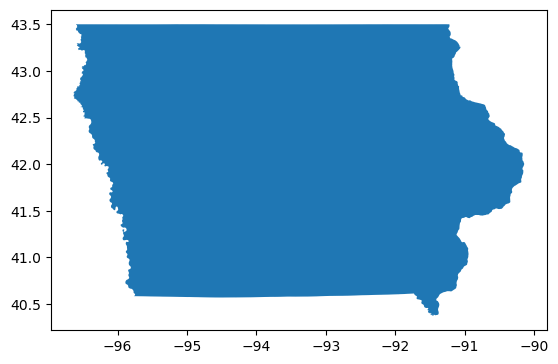

In [6]:
ia_boundary[ia_boundary["type"]=="boundary"].plot()

In [7]:
ia_boundary.explore()

In [8]:
# Define the city name and state
city = 'Cedar Rapids'
state = 'Iowa'

# Fetch the boundary polygon of the city
place_name = f'{city}, {state}, USA'
tags = {'place': 'city', 'name': city}
cr_gdf = ox.geometries_from_place(place_name, tags)
cr_gdf

/tmp/ipykernel_2157/3458676958.py:8: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release.
  cr_gdf = ox.geometries_from_place(place_name, tags)


ele gnis:feature_id          name place population  \
element_type osmid                                                           
node         151626808  247          465941  Cedar Rapids  city     137710   
relation     128355     NaN         2394368      Hiawatha  city        NaN   
             129078     NaN         2396389        Robins  city        NaN   
             129088     NaN          467567  Cedar Rapids  city        NaN   

                       population:date  wikidata              wikipedia  \
element_type osmid                                                        
node         151626808            2022   Q486439  en:Cedar Rapids, Iowa   
relation     128355                NaN  Q1922650      en:Hiawatha, Iowa   
             129078                NaN  Q1926058        en:Robins, Iowa   
             129088                NaN   Q486439  en:Cedar Rapids, Iowa   

                                                                 geometry  \
element_type osmid                                                          
node         151626808                         POINT (-91.67041 41.97589)   
relation     128355     POLYGON ((-91.67082 42.06598, -91.67083 42.065...   
             129078     MULTIPOLYGON (((-91.70149 42.10099, -91.69697 ...   
             129088     MULTIPOLYGON (((-91.72643 41.98905, -91.72643 ...   

                             name:en  ... tiger:LSAD tiger:MTFCC  \
element_type osmid                    ...                          
node         151626808  Cedar Rapids  ...        NaN         NaN   
relation     128355              NaN  ...         25       G4110   
             129078              NaN  ...         25       G4110   
             129088              NaN  ...         25       G4110   

                          tiger:NAME     tiger:NAMELSAD tiger:PCICBSA  \
element_type osmid                                                      
node         151626808           NaN                NaN           NaN   
relation     128355         Hiawatha      Hiawatha city             N   
             129078           Robins        Robins city             N   
             129088     Cedar Rapids  Cedar Rapids city             Y   

                       tiger:PCINECTA tiger:PLACEFP tiger:PLCIDFP  \
element_type osmid                                                  
node         151626808            NaN           NaN           NaN   
relation     128355                 N         35940       1935940   
             129078                 N         67800       1967800   
             129088                 N         12000       1912000   

                       tiger:STATEFP      type  
element_type osmid                              
node         151626808           NaN       NaN  
relation     128355               19  boundary  
             129078               19  boundary  
             129088               19  boundary  

[4 rows x 33 columns]

In [9]:
# Select out just the CR entries from this data
cr = cr_gdf[cr_gdf['name']=='Cedar Rapids']
cr

# Select out just the CR polygon
cr_poly = cr[cr['type']=='boundary']
cr_poly

ele gnis:feature_id          name place population  \
element_type osmid                                                        
relation     129088  NaN          467567  Cedar Rapids  city        NaN   

                    population:date wikidata              wikipedia  \
element_type osmid                                                    
relation     129088             NaN  Q486439  en:Cedar Rapids, Iowa   

                                                              geometry  \
element_type osmid                                                       
relation     129088  MULTIPOLYGON (((-91.72643 41.98905, -91.72643 ...   

                    name:en  ... tiger:LSAD tiger:MTFCC    tiger:NAME  \
element_type osmid           ...                                        
relation     129088     NaN  ...         25       G4110  Cedar Rapids   

                        tiger:NAMELSAD tiger:PCICBSA tiger:PCINECTA  \
element_type osmid                                                    
relation     129088  Cedar Rapids city             Y              N   

                    tiger:PLACEFP tiger:PLCIDFP tiger:STATEFP      type  
element_type osmid                                                       
relation     129088         12000       1912000            19  boundary  

[1 rows x 33 columns]

In [10]:
# Search for United Tribes Technical College
kirkwood_cc_gdf = osm.features_from_address(
    'Kirkwood Community College, Cedar Rapids, IA, United States',
    {'amenity': ['college']})
type(kirkwood_cc_gdf)

geopandas.geodataframe.GeoDataFrame

In [11]:
# Plot gdf using .explore()
kirkwood_cc_gdf.explore()

In [12]:
# Plot gdf using .explore()
cr_gdf.explore()

In [13]:
# Plot Kirkwood CC boundary
kirkwood_cc_map = kirkwood_cc_gdf.hvplot(
    # Givethe map a descriptive title
    title="Kirkwood Community College, Cedar Rapids, IA",
    # Add a basemap
    geo=True, tiles='EsriImagery',
    # Change the colors
    fill_color='white', fill_alpha=0.2,
    line_color='skyblue', line_width=5,
    # Change the image size
    frame_width=400, frame_height=400)

# Save the map as a file to put on the web
hv.save(kirkwood_cc_map, 'kirkwood_cc.html')

# Display the map
kirkwood_cc_map

:Overlay
   .WMTS.I     :WMTS   [Longitude,Latitude]
   .Polygons.I :Polygons   [Longitude,Latitude]

In [14]:
# Plot CR IA boundary
cr_map = cr_poly.hvplot(
    # Givethe map a descriptive title
    title="Cedar Rapids, IA (blue) and Kirkwood CC (red)",
    # Add a basemap
    geo=True, tiles='EsriImagery',
    # Change the colors
    fill_color='white', fill_alpha=0.2,
    line_color='skyblue', line_width=5,
    # Change the image size
    frame_width=400, frame_height=400) * \
    kirkwood_cc_gdf.hvplot(
    # Givethe map a descriptive title
    title="Cedar Rapids, IA and Kirkwood CC",
    # Add a basemap
    geo=True, tiles='EsriImagery',
    # Change the colors
    fill_color='white', fill_alpha=0.2,
    line_color='red', line_width=5,
    # Change the image size
    frame_width=400, frame_height=400)

# Save the map as a file to put on the web
hv.save(cr_map, 'cr.html')

# Display the map
cr_map

:Overlay
   .WMTS.I      :WMTS   [Longitude,Latitude]
   .Polygons.I  :Polygons   [Longitude,Latitude]
   .WMTS.II     :WMTS   [Longitude,Latitude]
   .Polygons.II :Polygons   [Longitude,Latitude]

In [15]:
# Search for University of Agriculture
uaf_gdf = osm.features_from_address(
    'University of Agriculture, Pakistan',
    {'amenity': ['university']})
uaf_gdf

nodes  \
element_type osmid                                                         
way          72617195  [861933573, 861933907, 861933470, 861933670, 8...   

                       addr:city        addr:street     amenity  \
element_type osmid                                                
way          72617195  فیصل آباد  یونیورسٹی مین روڈ  university   

                                        name  \
element_type osmid                             
way          72617195  جامعہ زرعیہ فیصل آباد   

                                                     name:en  \
element_type osmid                                             
way          72617195  University of Agriculture, Faisalabad   

                                       name:pnb                name:ur  \
element_type osmid                                                       
way          72617195  زرعی یونیورسٹی فیصل آباد  جامعہ زرعیہ فیصل آباد   

                       wikidata  \
element_type osmid                
way          72617195  Q7895024   

                                                                geometry  
element_type osmid                                                        
way          72617195  POLYGON ((73.07100 31.42482, 73.06857 31.42658...

In [16]:
pak_gdf.explore()

NameError: name 'pak_gdf' is not defined

In [ ]:
nigeria_url = "https://open.africa/dataset/83582021-d8f7-4bfd-928f-e9c6c8cb1247/resource/372a616a-66cc-41f7-ac91-d8af8f23bc2b/download/nigeria-lgas.zip"

nigeria_gdf = gpd.read_file(nigeria_url)
nigeria_gdf

STATE          LGA      AREA  PERIMETER LONGITUDE LATITUDE FULL_NAME  \
0       Sokoto         Gada  1193.977    170.095      None     None      None   
1       Sokoto       Illela  1298.423    174.726      None     None      None   
2       Sokoto      Tangaza  2460.715    209.702      None     None      None   
3        Borno       Abadam  2430.515    288.957      None     None      None   
4         Lake    Lake chad  5225.912    497.039      None     None      None   
..         ...          ...       ...        ...       ...      ...       ...   
770      Delta  Isoko North   485.467    169.369      None     None      None   
771      Niger        Lavun  3951.431    424.153      None     None      None   
772       Yobe         Bade   817.260    216.207      None     None      None   
773    Zamfara         Maru  7795.261    536.500      None     None      None   
774  Akwa Ibom         Oron    81.472     57.846      None     None      None   

                                              geometry  
0    POLYGON ((5.53632 13.88793, 5.53480 13.88488, ...  
1    POLYGON ((5.53632 13.88793, 5.54517 13.88419, ...  
2    POLYGON ((4.85548 13.76724, 4.86189 13.78085, ...  
3    POLYGON ((12.83189 13.39871, 12.83397 13.40439...  
4    POLYGON ((13.48608 13.30821, 13.48296 13.31344...  
..                                                 ...  
770  MULTIPOLYGON (((6.31996 5.63341, 6.32003 5.633...  
771  MULTIPOLYGON (((6.12188 9.09441, 6.12001 9.094...  
772  MULTIPOLYGON (((11.01052 12.80457, 11.00747 12...  
773  MULTIPOLYGON (((6.43894 12.41104, 6.43609 12.4...  
774  POLYGON ((8.22063 4.84473, 8.23405 4.82974, 8....  

[775 rows x 8 columns]

In [ ]:
nigeria_gdf.explore()

***

## Playing around with osm

In [ ]:
# Define the city name and state
#city = 'Cedar Rapids'
state = 'Edo'

# Fetch the boundary polygon of the city
place_name = f'{state}, Nigeria'
print(place_name)
tags = {'place': 'state', 'name': state}
print(tags)
edo_gdf = ox.geometries_from_place(place_name, tags)
edo_gdf

Edo, Nigeria
{'place': 'state', 'name': 'Edo'}


/tmp/ipykernel_2036/2428870189.py:10: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release.
  edo_gdf = ox.geometries_from_place(place_name, tags)


admin_level name name:ar name:de name:es    name:fa  \
element_type osmid                                                            
node         2163706699           4  Edo     NaN     NaN     NaN        NaN   
relation     3717119              4  Edo     إدو     Edo     Edo  ایالت ادو   

                            name:fr name:ko name:pl name:ru  ...     name:ro  \
element_type osmid                                           ...               
node         2163706699         NaN     NaN     NaN     Эдо  ...         NaN   
relation     3717119     État d'Edo     에도주     Edo     Эдо  ...  Statul Edo   

                        name:sr name:sv       name:sw      name:tr name:war  \
element_type osmid                                                            
node         2163706699     NaN     NaN           NaN          NaN      NaN   
relation     3717119        Едо     Edo  Jimbo la Edo  Edo Eyaleti      Edo   

                             name:yo name:zh official_name:ar      type  
element_type osmid                                                       
node         2163706699          NaN     NaN              NaN       NaN  
relation     3717119     Ìpínlẹ̀ Ẹdó     埃多州        ولاية إدو  boundary  

[2 rows x 58 columns]

In [ ]:
edo_gdf[edo_gdf['name:sw']=='Jimbo la Edo'].explore()

***

## Looking for AIANNH areas

In [ ]:
# Pine Ridge, SD
reservation_name = 'Pine Ridge Indian Reservation'
tags = {'boundary':'aboriginal_lands', 'name':reservation_name}

pine_ridge_gdf = ox.features_from_place(reservation_name, tags)
pine_ridge_gdf

name  \
element_type osmid                                     
way          37513073                            NaN   
relation     9436075   Pine Ridge Indian Reservation   
             9436089      Rosebud Indian Reservation   

                                          name:en             name:lkt  \
element_type osmid                                                       
way          37513073                         NaN                  NaN   
relation     9436075                          NaN  Wazí Aháŋhaŋ Oyáŋke   
             9436089   Rosebud Indian Reservation                  NaN   

                       wikidata                         wikipedia  \
element_type osmid                                                  
way          37513073       NaN                               NaN   
relation     9436075   Q1929568  en:Pine Ridge Indian Reservation   
             9436089   Q3813702     en:Rosebud Indian Reservation   

                                                                geometry  \
element_type osmid                                                         
way          37513073  LINESTRING (-102.55670 42.99976, -102.55665 42...   
relation     9436075   POLYGON ((-103.00103 43.60589, -103.00072 43.6...   
             9436089   MULTIPOLYGON (((-98.93805 43.10052, -98.93779 ...   

                                                                   nodes  \
element_type osmid                                                         
way          37513073  [1778413396, 7589973973, 7589973974, 439107098...   
relation     9436075   [[[462229289, 158786182, 158786184, 158785615,...   
             9436089   [[[9505984790, 9505984789, 9505984788, 9505984...   

                      admin_level          boundary  \
element_type osmid                                    
way          37513073           8  aboriginal_lands   
relation     9436075          NaN  aboriginal_lands   
             9436089          NaN  aboriginal_lands   

                                                                  source  \
element_type osmid                                                         
way          37513073  TIGER/Line® 2008 Place Shapefiles (http://www....   
relation     9436075   https://www2.census.gov/geo/maps/DC2020/Tribal...   
             9436089                                                 NaN   

                                                                    ways  \
element_type osmid                                                         
way          37513073                                                NaN   
relation     9436075   [809716534, 1033447754, 37513073, 136109710, 1...   
             9436089   [1031408502, 1031408504, 1031408503, 103140850...   

                                  alt_name            operator      type  \
element_type osmid                                                         
way          37513073                  NaN                 NaN       NaN   
relation     9436075     Pine Ridge Agency  Oglala Sioux Tribe  boundary   
             9436089   Rosebud Reservation                 NaN  boundary   

                               alt_name:en  
element_type osmid                          
way          37513073                  NaN  
relation     9436075                   NaN  
             9436089   Rosebud Reservation

In [ ]:
# Select out Wazí Aháŋhaŋ Oyáŋke
wao_boundary = pine_ridge_gdf[pine_ridge_gdf["name:lkt"]=="Wazí Aháŋhaŋ Oyáŋke"]
wao_boundary

name name:en  \
element_type osmid                                            
relation     9436075  Pine Ridge Indian Reservation     NaN   

                                 name:lkt  wikidata  \
element_type osmid                                    
relation     9436075  Wazí Aháŋhaŋ Oyáŋke  Q1929568   

                                             wikipedia  \
element_type osmid                                       
relation     9436075  en:Pine Ridge Indian Reservation   

                                                               geometry  \
element_type osmid                                                        
relation     9436075  POLYGON ((-103.00103 43.60589, -103.00072 43.6...   

                                                                  nodes  \
element_type osmid                                                        
relation     9436075  [[[462229289, 158786182, 158786184, 158785615,...   

                     admin_level          boundary  \
element_type osmid                                   
relation     9436075         NaN  aboriginal_lands   

                                                                 source  \
element_type osmid                                                        
relation     9436075  https://www2.census.gov/geo/maps/DC2020/Tribal...   

                                                                   ways  \
element_type osmid                                                        
relation     9436075  [809716534, 1033447754, 37513073, 136109710, 1...   

                               alt_name            operator      type  \
element_type osmid                                                      
relation     9436075  Pine Ridge Agency  Oglala Sioux Tribe  boundary   

                     alt_name:en  
element_type osmid                
relation     9436075         NaN

In [ ]:
# Plot Wazí Aháŋhaŋ Oyáŋke
wao_boundary.explore()

In [ ]:
# Oglala Lakota College
college_name = 'Oglala Lakota College'
tags = {'amenity':'university', 'name':college_name}

olc_gdf = ox.features_from_place(college_name, tags)
olc_gdf

amenity                   name  \
element_type osmid                                        
node         2377246793  college  Oglala Lakota College   
way          970931215   college  Oglala Lakota College   

                                                                  geometry  \
element_type osmid                                                           
node         2377246793                        POINT (-102.24072 43.36635)   
way          970931215   POLYGON ((-102.23957 43.36899, -102.23741 43.3...   

                                                                     nodes  \
element_type osmid                                                           
node         2377246793                                                NaN   
way          970931215   [8986031620, 8986031621, 8986031622, 898603162...   

                         wikidata  
element_type osmid                 
node         2377246793       NaN  
way          970931215   Q7080082

In [ ]:
# Select the polygon
olc_poly = olc_gdf[olc_gdf["wikidata"]=="Q7080082"]
olc_poly

amenity                   name  \
element_type osmid                                       
way          970931215  college  Oglala Lakota College   

                                                                 geometry  \
element_type osmid                                                          
way          970931215  POLYGON ((-102.23957 43.36899, -102.23741 43.3...   

                                                                    nodes  \
element_type osmid                                                          
way          970931215  [8986031620, 8986031621, 8986031622, 898603162...   

                        wikidata  
element_type osmid                
way          970931215  Q7080082

In [ ]:
# Map olc_poly
olc_poly.explore()

In [ ]:
# Oglala Lakota College (Kyle, SD) - Buildings
college_name = 'Oglala Lakota College'
city_name = 'Kyle'
state_name = 'South Dakota'
tags = {'building':'university', 'name':college_name, 'city':city_name, 'state':state_name}

olc_buildings_gdf = ox.features_from_place(college_name, tags)
olc_buildings_gdf

olc_buildings_gdf.explore()

In [ ]:
# Oglala Lakota College (Rapid City, SD) - Buildings
college_name = 'Oglala Lakota College'
city_name = 'Rapid City'
state_name = 'South Dakota'
tags = {'amenity':'university', 'name':college_name, 'state':state_name}

olc_rapid_buildings_gdf = ox.features_from_address(college_name, tags)
olc_rapid_buildings_gdf

amenity                   name  \
element_type osmid                                        
node         2377246793  college  Oglala Lakota College   
way          970931215   college  Oglala Lakota College   

                                                                  geometry  \
element_type osmid                                                           
node         2377246793                        POINT (-102.24072 43.36635)   
way          970931215   POLYGON ((-102.23957 43.36899, -102.23741 43.3...   

                                                                     nodes  \
element_type osmid                                                           
node         2377246793                                                NaN   
way          970931215   [8986031620, 8986031621, 8986031622, 898603162...   

                         wikidata  
element_type osmid                 
node         2377246793       NaN  
way          970931215   Q7080082

In [ ]:
# Search for OLC (Rapid City)
olc_rapid_gdf = osm.features_from_address(
    'Oglala Lakota College, Rapid City, SD, United States',
    {'amenity': ['college']})
olc_rapid_gdf

olc_rapid_gdf.explore()

In [ ]:
# Search for OLC (Kyle)
college_name = 'Oglala Lakota College'
tags = {'building':'college', 'amenity':'college', 'name':college_name}
olc_kyle_gdf = ox.features_from_place(college_name, tags)
olc_kyle_gdf
olc_kyle_gdf.explore()

In [ ]:
# UTTC - Buildings
college_name = 'United Tribes Technical College'
city_name = 'Bismarck'
state_name = 'North Dakota'
tags = {'building':'college', 'name':college_name, 'city':city_name, 'state':state_name}

uttc_gdf = ox.features_from_place(college_name, tags)
uttc_gdf

uttc_gdf.explore()

*** 

## Iowa City University Buildings

In [ ]:
# U of Iowa - Buildings
university_name = 'The University of Iowa'
city_name = 'Iowa City'
state_name = 'Iowa'
tags = {'building':'university', 'city':city_name, 'state':state_name}

uiowa_buildings_gdf = ox.features_from_place(university_name, tags)
uiowa_buildings_gdf

geometry  \
element_type osmid                                                           
way          92980511    POLYGON ((-91.54348 41.66177, -91.54348 41.662...   
             92980515    POLYGON ((-91.54394 41.66348, -91.54394 41.663...   
             97402194    POLYGON ((-91.54544 41.66316, -91.54509 41.663...   
             98963423    POLYGON ((-91.53862 41.66352, -91.53845 41.663...   
             98963424    POLYGON ((-91.53673 41.66305, -91.53652 41.663...   
...                                                                    ...   
             1012809758  POLYGON ((-91.53519 41.66737, -91.53519 41.667...   
relation     2083330     POLYGON ((-91.54664 41.66240, -91.54668 41.662...   
             8736392     MULTIPOLYGON (((-91.53408 41.66517, -91.53395 ...   
             10032651    POLYGON ((-91.53556 41.65778, -91.53503 41.657...   
             10052744    POLYGON ((-91.58117 41.66237, -91.58034 41.662...   

                              amenity  \
element_type osmid                      
way          92980511             NaN   
             92980515          clinic   
             97402194             NaN   
             98963423             NaN   
             98963424             NaN   
...                               ...   
             1012809758           NaN   
relation     2083330              NaN   
             8736392              NaN   
             10032651    music_school   
             10052744             NaN   

                                                                      name  \
element_type osmid                                                           
way          92980511                                     Nursing Building   
             92980515                   Westlawn - Student Health Services   
             97402194    Medical Education and Biomedical Research Faci...   
             98963423                                  Iowa Memorial Union   
             98963424                                          Calvin Hall   
...                                                                    ...   
             1012809758                                                NaN   
relation     2083330                            Medical Education Building   
             8736392                                  110 East Bloomington   
             10032651                                Voxman Music Building   
             10052744                Hawkeye Tennis and Recreation Complex   

                        parking layer                operator access  \
element_type osmid                                                     
way          92980511       NaN   NaN                     NaN    NaN   
             92980515       NaN   NaN  The University of Iowa    NaN   
             97402194       NaN   NaN                     NaN    NaN   
             98963423       NaN   NaN                     NaN    NaN   
             98963424       NaN   NaN                     NaN    NaN   
...                         ...   ...                     ...    ...   
             1012809758     NaN   NaN                     NaN    NaN   
relation     2083330        NaN   NaN                     NaN    NaN   
             8736392        NaN   NaN                     NaN    NaN   
             10032651       NaN   NaN                     NaN    NaN   
             10052744       NaN   NaN                     NaN    NaN   

                                                                     nodes  \
element_type osmid                                                           
way          92980511    [1077851443, 1077851452, 1077851490, 135330424...   
             92980515    [4374102416, 1077851484, 1077851486, 107785144...   
             97402194    [1128067118, 1128067112, 1128067125, 112806701...   
             98963423    [1144948836, 6789252024, 6789252025, 678925202...   
             98963424    [1144948814, 1144948812, 1144948842, 114494881...   
...                

In [ ]:
uiowa_buildings_gdf.plot()

<Axes: >

In [ ]:
# U of Iowa - Van Allen Hall
university_name = 'The University of Iowa'
building_name = 'Van Allen Hall'
city_name = 'Iowa City'
state_name = 'Iowa'
tags = {'building':'university', 'city':city_name, 'state':state_name}

vah_gdf = ox.features_from_place(building_name, tags)
vah_gdf

nodes  \
element_type osmid                                                          
way          116181505  [1310721682, 1310721666, 1310721597, 131072165...   

                       addr:housenumber addr:postcode addr:state  \
element_type osmid                                                 
way          116181505               30         52242         IA   

                                 addr:street    building            name  \
element_type osmid                                                         
way          116181505  North Dubuque Street  university  Van Allen Hall   

                         name:etymology name:etymology:wikidata  \
element_type osmid                                                
way          116181505  James Van Allen                 Q271963   

                       name:etymology:wikipedia         source  \
element_type osmid                                               
way          116181505       en:James Van Allen  USGS Geonames   

                                                                 geometry  
element_type osmid                                                         
way          116181505  POLYGON ((-91.53214 41.66171, -91.53214 41.662...

In [ ]:
vah_gdf.explore()

In [ ]:
# U of Iowa - All Buildings
university_name = 'The University of Iowa'
city_name = 'Iowa City'
state_name = 'Iowa'
tags = {'building':'university', 'city':city_name, 'state':state_name}

uiowa_buildings_gdf = ox.features_from_place(university_name, tags)
uiowa_buildings_gdf

geometry  \
element_type osmid                                                           
way          92980511    POLYGON ((-91.54348 41.66177, -91.54348 41.662...   
             92980515    POLYGON ((-91.54394 41.66348, -91.54394 41.663...   
             97402194    POLYGON ((-91.54544 41.66316, -91.54509 41.663...   
             98963423    POLYGON ((-91.53862 41.66352, -91.53845 41.663...   
             98963424    POLYGON ((-91.53673 41.66305, -91.53652 41.663...   
...                                                                    ...   
             1012809758  POLYGON ((-91.53519 41.66737, -91.53519 41.667...   
relation     2083330     POLYGON ((-91.54664 41.66240, -91.54668 41.662...   
             8736392     MULTIPOLYGON (((-91.53408 41.66517, -91.53395 ...   
             10032651    POLYGON ((-91.53556 41.65778, -91.53503 41.657...   
             10052744    POLYGON ((-91.58117 41.66237, -91.58034 41.662...   

                              amenity  \
element_type osmid                      
way          92980511             NaN   
             92980515          clinic   
             97402194             NaN   
             98963423             NaN   
             98963424             NaN   
...                               ...   
             1012809758           NaN   
relation     2083330              NaN   
             8736392              NaN   
             10032651    music_school   
             10052744             NaN   

                                                                      name  \
element_type osmid                                                           
way          92980511                                     Nursing Building   
             92980515                   Westlawn - Student Health Services   
             97402194    Medical Education and Biomedical Research Faci...   
             98963423                                  Iowa Memorial Union   
             98963424                                          Calvin Hall   
...                                                                    ...   
             1012809758                                                NaN   
relation     2083330                            Medical Education Building   
             8736392                                  110 East Bloomington   
             10032651                                Voxman Music Building   
             10052744                Hawkeye Tennis and Recreation Complex   

                        parking layer                operator access  \
element_type osmid                                                     
way          92980511       NaN   NaN                     NaN    NaN   
             92980515       NaN   NaN  The University of Iowa    NaN   
             97402194       NaN   NaN                     NaN    NaN   
             98963423       NaN   NaN                     NaN    NaN   
             98963424       NaN   NaN                     NaN    NaN   
...                         ...   ...                     ...    ...   
             1012809758     NaN   NaN                     NaN    NaN   
relation     2083330        NaN   NaN                     NaN    NaN   
             8736392        NaN   NaN                     NaN    NaN   
             10032651       NaN   NaN                     NaN    NaN   
             10052744       NaN   NaN                     NaN    NaN   

                                                                     nodes  \
element_type osmid                                                           
way          92980511    [1077851443, 1077851452, 1077851490, 135330424...   
             92980515    [4374102416, 1077851484, 1077851486, 107785144...   
             97402194    [1128067118, 1128067112, 1128067125, 112806701...   
             98963423    [1144948836, 6789252024, 6789252025, 678925202...   
             98963424    [1144948814, 1144948812, 1144948842, 114494881...   
...                

In [ ]:
uiowa_buildings_gdf.explore()

In [17]:
%%capture
%%bash
jupyter nbconvert first-map.ipynb --to html